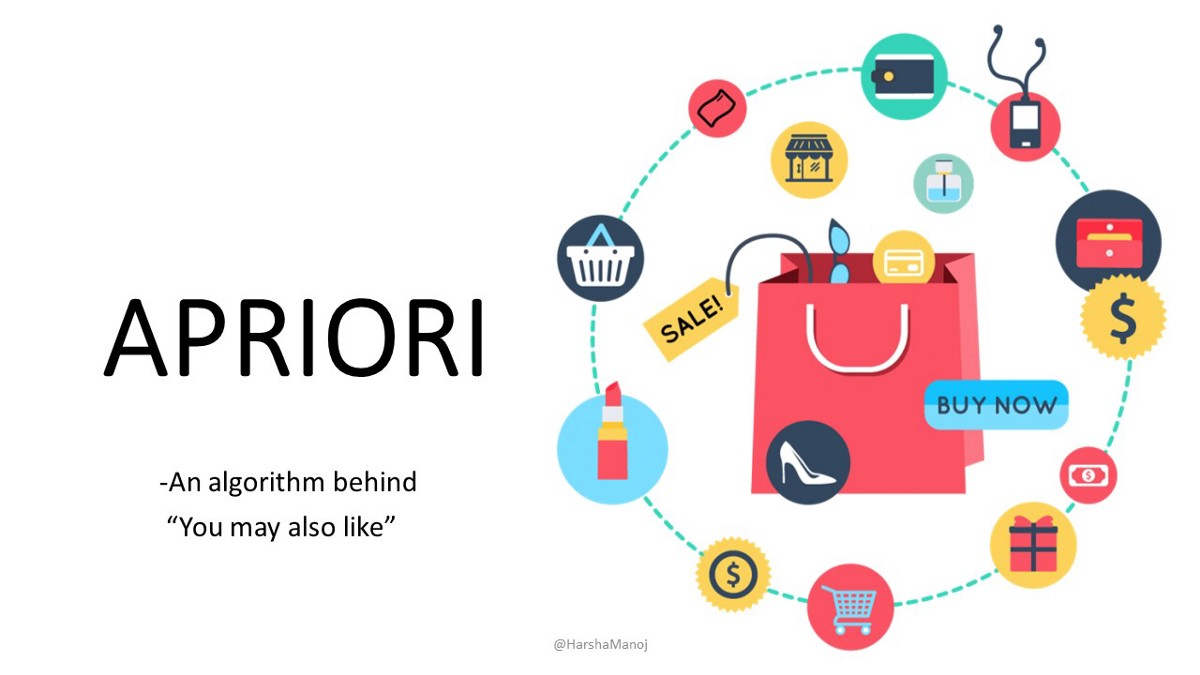

In [10]:
from collections import defaultdict
from itertools import chain, combinations
from csv import reader

In [11]:
itemSetList = [['eggs', 'bacon', 'soup'],
                ['eggs', 'bacon', 'apple'],
                ['soup', 'bacon', 'banana']]

# If input is a file

In [31]:
def getFromFile(fname):
    itemSets = []
    itemSet = set()

    with open(fname, 'r') as file:
        csv_reader = reader(file)
        for line in csv_reader:
            line = list(filter(None, line))
            record = set(line)
            for item in record:
                itemSet.add(frozenset([item]))
            itemSets.append(record)
    return itemSet, itemSets

In [38]:
C1ItemSet, itemSetList = getFromFile('/content/data.csv')
itemSetList

[{'Butter', 'Cheese', 'Coffee Powder', 'Ghee', 'Lassi', 'Yougurt'},
 {'Coffee Powder', 'Ghee'},
 {'Butter', 'Cheese', 'Lassi', 'Tea Powder'},
 {'Bread', 'Butter', 'Cheese', 'Coffee Powder', 'Panner', 'Tea Powder'},
 {'Butter', 'Cheese', 'Coffee Powder', 'Sugar', 'Sweet', 'Yougurt'},
 {'Ghee', 'Milk', 'Panner', 'Sugar', 'Sweet', 'Tea Powder'},
 {'Coffee Powder', 'Sweet'},
 {'Butter', 'Ghee', 'Panner'},
 {'Butter', 'Cheese', 'Sugar', 'Sweet', 'Tea Powder', 'Yougurt'},
 {'Ghee', 'Panner'},
 {'Bread', 'Milk', 'Panner', 'Sweet', 'Tea Powder'},
 {'Butter',
  'Coffee Powder',
  'Ghee',
  'Lassi',
  'Milk',
  'Panner',
  'Sugar',
  'Yougurt'},
 {'Butter', 'Coffee Powder', 'Ghee', 'Lassi', 'Panner', 'Sweet'},
 {'Bread',
  'Coffee Powder',
  'Ghee',
  'Lassi',
  'Panner',
  'Sugar',
  'Sweet',
  'Tea Powder'},
 {'Butter', 'Lassi', 'Milk', 'Panner', 'Sugar', 'Sweet'},
 {'Bread', 'Coffee Powder', 'Tea Powder'},
 {'Butter', 'Cheese', 'Ghee', 'Milk'},
 {'Bread', 'Coffee Powder'},
 {'Cheese', 'Coffee

# Get the Unique Items from the List

In [12]:
def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet

In [13]:
C1ItemSet = getItemSetFromList(itemSetList)
C1ItemSet

{frozenset({'soup'}),
 frozenset({'banana'}),
 frozenset({'apple'}),
 frozenset({'eggs'}),
 frozenset({'bacon'})}

Frozen set is just an immutable version of a Python set object. While elements of a set can be modified at any time, elements of the frozen set remain the same after creation. Due to this, frozen sets can be used as keys in Dictionary or as elements of another set.


# Support

* ***Calculate the Support of individual item***

* **Support** = *freq(X) / N*

Step1: Count the frequency of each item. \
Step2: Calculate the support. \
Step3: If Support is >= threshold_support, then consider that item.

In [14]:
 # Final result global frequent itemset
globalFreqItemSet = dict()
# Storing global itemset with support count
globalItemSetWithSup = defaultdict(int)

In [15]:
def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet

In [16]:
minSup = 0.5
L1ItemSet = getAboveMinSup(C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
L1ItemSet

{frozenset({'eggs'}), frozenset({'bacon'}), frozenset({'soup'})}

Only bacon, soup and eggs of total 5 items are >= minSup.

In [17]:
def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])

Take 2 elements and 

In [18]:
currentLSet = L1ItemSet
k = 2

In [19]:
L1ItemSet

{frozenset({'eggs'}), frozenset({'bacon'}), frozenset({'soup'})}

# Confidence

**Check which items as a group are brought together based on confidence metric**

Confidence = freq(X, Y) / freq(X). \

Confidence gives what percent item Y will be purchased if X is purchased.

In [20]:
getUnion(currentLSet, k)

{frozenset({'bacon', 'soup'}),
 frozenset({'bacon', 'eggs'}),
 frozenset({'eggs', 'soup'})}

* if the subset is not in previous K-frequent get, then remove the set

In [21]:
def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet

In [22]:
def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

* Associate the items if conf is greater than 50%

In [23]:
def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules

In [24]:
# Calculating frequent item set
while(currentLSet):
    # Storing frequent itemset
    globalFreqItemSet[k-1] = currentLSet
    # Self-joining Lk
    candidateSet = getUnion(currentLSet, k)
    # Perform subset testing and remove pruned supersets
    candidateSet = pruning(candidateSet, currentLSet, k-1)
    # Scanning itemSet for counting support
    currentLSet = getAboveMinSup(
    candidateSet, itemSetList, minSup, globalItemSetWithSup)
    k += 1

minConf = 0.5
rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
rules.sort(key=lambda x: x[2])

globalFreqItemSet

rules

[[{'bacon'}, {'eggs'}, 0.6666666666666666],
 [{'bacon'}, {'soup'}, 0.6666666666666666],
 [{'eggs'}, {'bacon'}, 1.0],
 [{'soup'}, {'bacon'}, 1.0]]